# Beacon Time Series, across the transition

Edit selector= below

Look at the beacons with the largest normalized spread.

( Steal plotMultiBeacons() from here.)

In [1]:
import math
import numpy as np
import pandas as pd
import BQhelper as bq

%matplotlib nbagg
import matplotlib.pyplot as plt

bq.project = "mlab-sandbox"
# bq.dataset = 'mattmathis'
# bq.UnitTestRunQuery()
# bq.UnitTestWriteQuery()
UnitTest=False

In [2]:
# Plot simple timeseries for a list of beacons
# UnitTest=True

# Modified start date

query="""
SELECT
  a.TestTime,
  client.IP,
  a.MeanThroughputMbps,
  node._instruments
# FROM   `mlab-sandbox.mm_unified_testing.unified_{selector}`
FROM `measurement-lab.ndt.unified_{selector}`
WHERE client.IP in ( {clientIP} )
AND test_date >= '2018-01-01'
ORDER BY TestTime

"""
global StashData

 
def plotMultiBeacons(clients, columns=1, width=10, data=None, selector='downloads'):
    if data is None:
        clist = '"'+'", "'.join(clients)+'"'
        data=bq.QueryTimestampTimeseries(query, clientIP=clist, selector=selector)
        global StashData # Skip slow queries when debugging
        StashData = data
    rows = math.ceil(len(clients) / float(columns))
    figLen = width/float(columns)*rows  # assume square subplots
    print('Size', figLen, width)
    plt.rcParams['figure.figsize'] = [ width, figLen]
    
    fig, axs = plt.subplots(nrows=rows, ncols=columns, squeeze=False, sharex='all')
    for ax, client in zip([i for j in axs for i in j], clients):
        print ('Beacon: '+client)
        ax.set_title('Beacon: '+client)
        cdata = data[data['IP'] == client]
        ax.plot(cdata['MeanThroughputMbps'][cdata["_instruments"] == 'web100'], 'b.',
            cdata['MeanThroughputMbps'][cdata["_instruments"] == 'tcpinfo'], 'r.')
    fig.autofmt_xdate()
    fig.show()

if UnitTest:
    # %matplotlib nbagg

    try:
        TestData = StashData
        print('Using StashData')
    except:
        pass

    try:
        TestData
    except:
        print('Genereating test data')
        clients = [
            '69.68.23.44', # Max deltaMean
            '96.229.66.58', # Max deltaMax
            '73.210.92.196',
        ]
        
        clist = '"'+'", "'.join(clients)+'"'
        TestData=bq.QueryTimestampTimeseries(query, clientIP=clist, selector='downloads')
    # plt.ion()
    clients=list(TestData['IP'].unique())
    print (clients)
    plotMultiBeacons(clients, data=TestData, columns=2, width=10)
    print ('Done')


Size 25.0 10


<IPython.core.display.Javascript object>


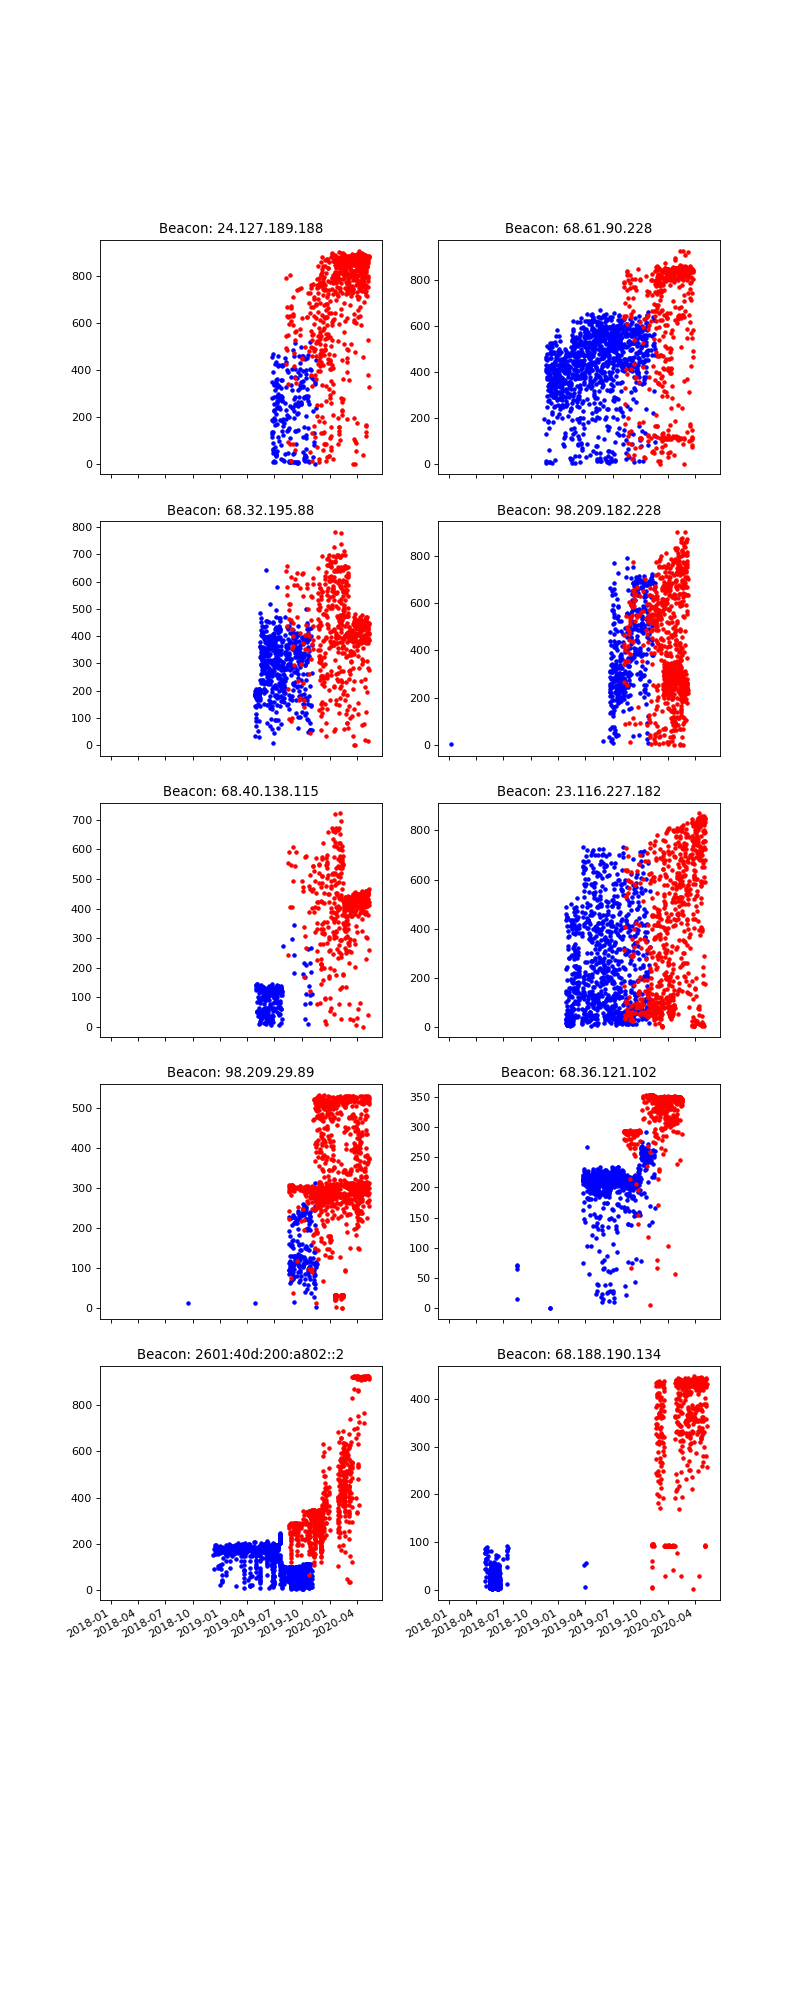

Beacon: 24.127.189.188
Beacon: 68.61.90.228
Beacon: 68.32.195.88
Beacon: 98.209.182.228
Beacon: 68.40.138.115
Beacon: 23.116.227.182
Beacon: 98.209.29.89
Beacon: 68.36.121.102
Beacon: 2601:40d:200:a802::2
Beacon: 68.188.190.134


In [4]:
MIfastAfter=[
    '24.127.189.188',
    '68.61.90.228',
    '68.32.195.88',
    '98.209.182.228',
    '68.40.138.115',
    '23.116.227.182',
    '98.209.29.89',
    '68.36.121.102',
    '2601:40d:200:a802::2',
    '68.188.190.134']
    
    
    
plotMultiBeacons(MIfastAfter, columns=2, width=10)
